# Projekt - Breast Cancer Wisconsin (Diagnostic) Data Set 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ucitavanje podataka iz csv datoteke
data = pd.read_csv("C:/Users/Korisnik/Downloads/archive/data.csv", sep=",")


U ovom projektu pregledani su i vizualizirani podaci iz seta podataka Breast Cancer Wisconsin (Diagnostic) Data Set 

In [2]:
# broj redaka i stupaca podataka
print ("Broj redaka i stupaca u setu podataka ", data.shape)

Broj redaka i stupaca u setu podataka  (569, 33)


Nazivi atributa

In [3]:
# nazivi stupaca 
data.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype=object)

Prepoznajemo jedan atribut Unnamed koji se pojavio zbog delimitera nakon zadnjeg atributa, pa ćemo izbacit taj stupac

Sad imamo jedan stupac manje kako i treba biti

In [4]:
# Imamo stupac Unnamed koji je prepoznat zbog delimitera nakon zadnjeg stupca pa ćemo ga izbacit 
data = data.drop('Unnamed: 32', axis=1, errors='ignore')
print("Broj redaka i stupaca ", data.shape)


Broj redaka i stupaca  (569, 32)


U tablici vidimo osnovne informacije o stupcima (broj not-null vrijednosti i tip podatka)
Svi podaci su numerički osim atributa diagnosis, prema ovim rezultatima nema null vrijednosti

In [5]:
# osnovne informacije o stupcima 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Opis atributa 
-id: identifikacijski broj osobe na koju se podaci odnose
-diagnosis: vrsta tumora - B = benigni, M = maligni 

Zatim slijede 3 grupe po 10 istih atributa, prva grupa odnosi se na srednju vrijednost, druga na standardnu devijaciju i treća na najgori slučaj:
-radius: radijus           
-texture: tekstura           
-perimeter: opseg           
-area: površina          
-smoothness: glatkoća       
-compactness: kompaktnost          
-concavity: konkavnost            
-concave points: konkavne točke  
-symmetry: simetrija            
-fractal_dimension: fraktalna dimenzija 

S obzirom da su svi podaci numeričke vrijednosti, možda je umjesto null ili praznog polja upisana 0, što ćemo provjerit sljedećom funkcijom 


In [6]:
def provjeriNule(data):
    atributi_s_nulama = []
    
    for stupac in data.columns:
        if (data[stupac] == 0).any():
            atributi_s_nulama.append(stupac)
    
    return atributi_s_nulama

atributiSNulama = provjeriNule(data)
print("Atributi s vrijednošću 0:", atributiSNulama)

Atributi s vrijednošću 0: ['concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']


Atributi s nulama su vezani za konkavnost uzoraka, pa su nule u podacima opravdane i moguće
Ne treba izbacivati redove koji sadrže takve vrijednosti

Provjerit ćemo postoji li atribut koji je monoton:

In [7]:
#funkcija nunique provjerava postoji li neki atribut koji je monoton, vraća broj jedinstvenih vrijednosti svakog atributa
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

Svi atributi (osim diagnosis) imaju veliki broj jedinstvenih vrijendosti ali s obzirom da se radi o različitim mjerenjima, to ne znači da su oni monotoni
Monotoni atribut jedino je id pa ćemo njega izbaciti iz skupa podataka

In [8]:
data = data.drop(('id'), axis=1, errors='ignore')

Atributi koji su ostali u skupu podataka: 

In [9]:
# atributi koji su ostali u skupu podataka
data.columns.values

array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

Nekonzistentnih podataka vjerojatno nema jer su svi numerički 
Provjeravamo postoje li možda rijetki podaci

In [10]:
gustoca = np.count_nonzero(data) / float(data.size)
print("gustoća podataka: ", gustoca)

gustoća podataka:  0.9955779806111458


Gustoća je približno 1 i ne postoje rijetki podaci

Provjerit ćemo postoje li stršeće vrijednosti na dva načina.
Prvi način je pomoću funkcije describe koja će za sve numeričke podatke ispisat broj podataka, srednju vrijednost, standardnu devijaciju, minimum, maksimum, te prvi, drugi i treći kvartil.
Ovdje možemo gledati razliku minimuma i drugog kvartila, te razliku maksimuma i treceg kvartila - velike razlike predstavljaju strsece vrijednosti.

In [11]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


S obzirom da je ovaj nacin nepregledan napravljena je funkcija koja za strsece vrijednosti smatra vrijednosti vece od Q3 + 1..5 * IQR i vrijednosti manje od Q1 - 1.5 * IQR


In [12]:
def strsece(data):
    
    lower_limits = data.quantile(0.25) - 1.5 * (data.quantile(0.75) - data.quantile(0.25))
    upper_limits = data.quantile(0.75) + 1.5 * (data.quantile(0.75) - data.quantile(0.25))

    outliers = ((data < lower_limits) | (data > upper_limits))

    outlier_counts = outliers.sum()

    return outlier_counts

outliers = strsece(data.drop(data.columns[0], axis=1))
print (outliers)

radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64


Prema ovom ispisu i metodi prisutno je dosta strsecih vrijednosti

Druga metoda je vizualizacija 
Pomoću kutijastih dijagrama prikazujemo odnos minimuma, maksimuma, donjeg i gornjeg kvartila te stršećih vrijednosti
Kutijasti dijagram za atribut radius_mean

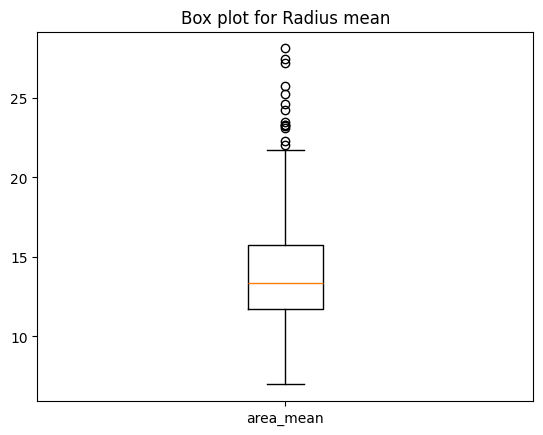

In [13]:
plt.boxplot([data['radius_mean']], labels=["area_mean"])
plt.title('Box plot for Radius mean')
plt.show()

Kutijasti dijagram za atribut area_se koji ima puno stršećih vrijednosti

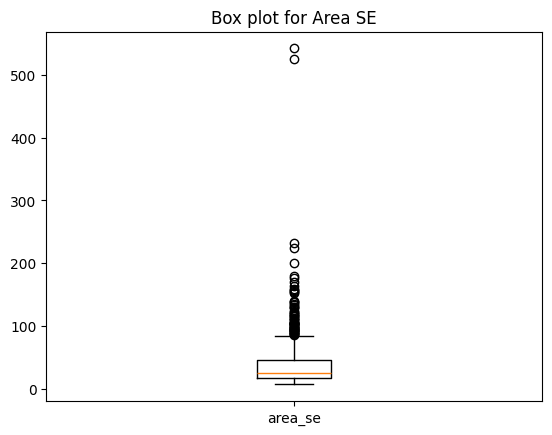

In [14]:
plt.boxplot(data['area_se'], labels=["area_se"])
plt.title('Box plot for Area SE')
plt.show()

In [15]:
print("srednja vrijednost atributa area_se je ", data['area_se'].mean()) 

srednja vrijednost atributa area_se je  40.337079086116


Kutijasti dijagram za atribut concave points_worst - nema stršećih vrijednosti

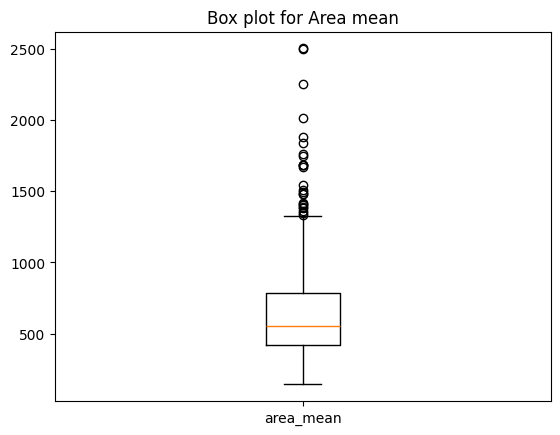

In [16]:
plt.boxplot(data['area_mean'], labels=["area_mean"])
plt.title('Box plot for Area mean')
plt.show()

Kao što se vidi iz prethodnih grafova atributi area_se i area_mean imaju nekoliko stršećih vrijednosti koje dosta odstupaju od ostalih stršećih vrijednosti.
Moguće je da je došlo do pogreške prilikom mjerenja ili upisivanja podataka, ali moguće je i da su to stvarni podaci.
S obzirom na to nećemo ih ukloniti iz skupa podataka, ali imat ćemo ih na umu u sljedećim koracima projekta.

Kutijasti dijagram za atribut concave points_worst - nema stršećih vrijednosti

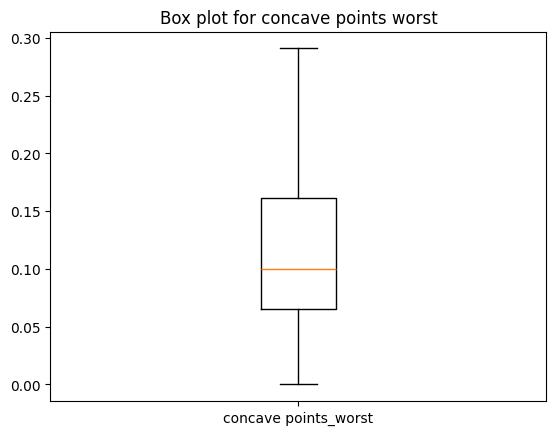

In [17]:
plt.boxplot(data['concave points_worst'], labels=["concave points_worst"])
plt.title('Box plot for concave points worst')
plt.show()

Vrijednosti stupca diagnosis pretvorit ćemo u 1 za maligni tj. M i u 0 za benigni tj. B zbog lakšeg korištenja kasnije 

In [18]:
data['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
counts = data['diagnosis'].value_counts()
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Pitni graf za usporedbu pojavljivanja pojedine dijagnoze 
Maligni tumori čine 37.26% podataka, a benigni 62.74%

Broj dijagnosticiranih benignih (0) i malignih (1) tumora: 
 diagnosis
0    357
1    212
Name: count, dtype: int64


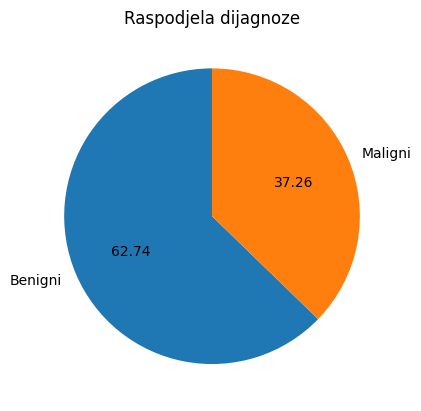

In [19]:
counts = data['diagnosis'].value_counts()
print("Broj dijagnosticiranih benignih (0) i malignih (1) tumora: \n", counts)
count_per_diagnosis = data['diagnosis'].replace({1: 'Maligni', 0: 'Benigni'}).value_counts()
diagnosis_labels = count_per_diagnosis.index

plt.pie(count_per_diagnosis, labels=diagnosis_labels, autopct='%.2f', startangle=90)
plt.title('Raspodjela dijagnoze')
plt.show()

Prikaz matrice korelacije s vrijednostima korelacije pokzauje koji su atributi moguće međusobno ovisni.
Što je moja ćelije tamnija to je povezanost veća.
Brojke u minusu predstavljaju inverznu vezu.

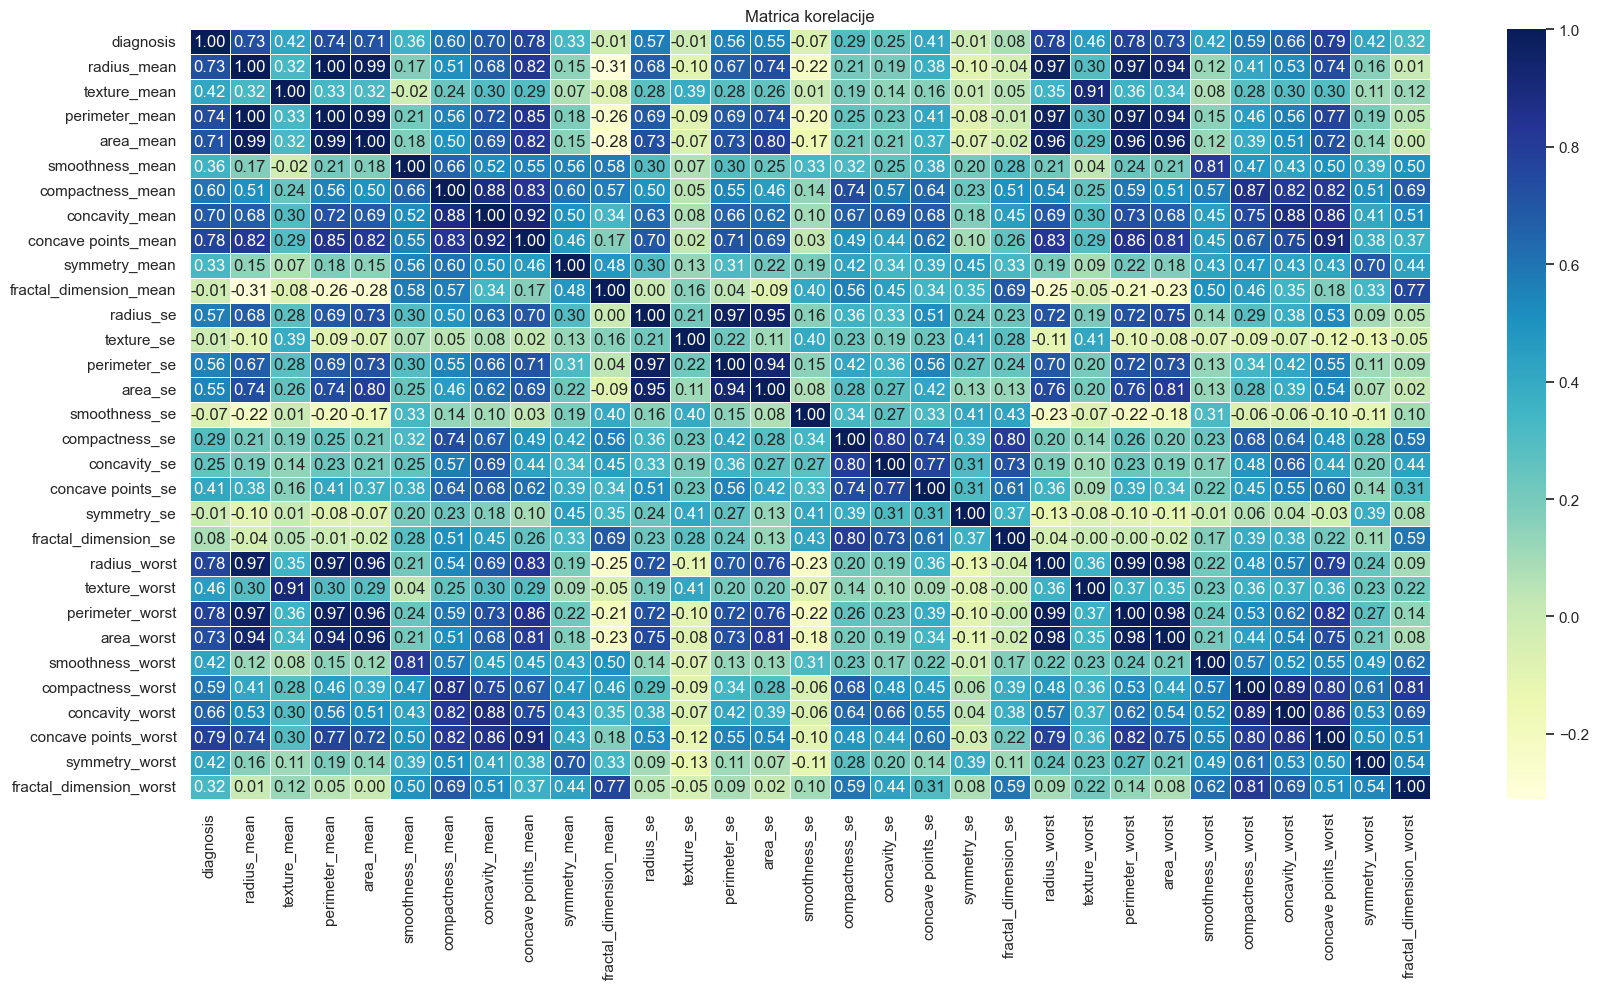

In [20]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Matrica korelacije")
plt.show()

Očekivano, korelacija između radijusa i opsega je 1, a visoka je i za radijus i površinu. 
Najviše nas možda zanima dio u kojem je dijagnoza korelirana s ostalim atributima (prvi red i stupac).
Dijagnoza je relativno visoko korelirana s radijusom, površinom i opsegom i konkavnošću. 
Napravit ćeemo nekoliko histograma kako bi prikazali distribuciju podataka koja će kasnije bit važan preduvjet nekim testovima.
S obzirom da su numeričke varijable koje promatramo kontinuirane, dolazi do diskretizacije vrijednosti.
Postavljanje matrice za prikaz vise grafova.
Prvi graf - Histogram radius_mean.
Drugi graf - Histogram texture_mean s prikazom srednje vrijednosti i medijana.
Treci graf - Histogram za atribut s puno stršećih vrijednosti.

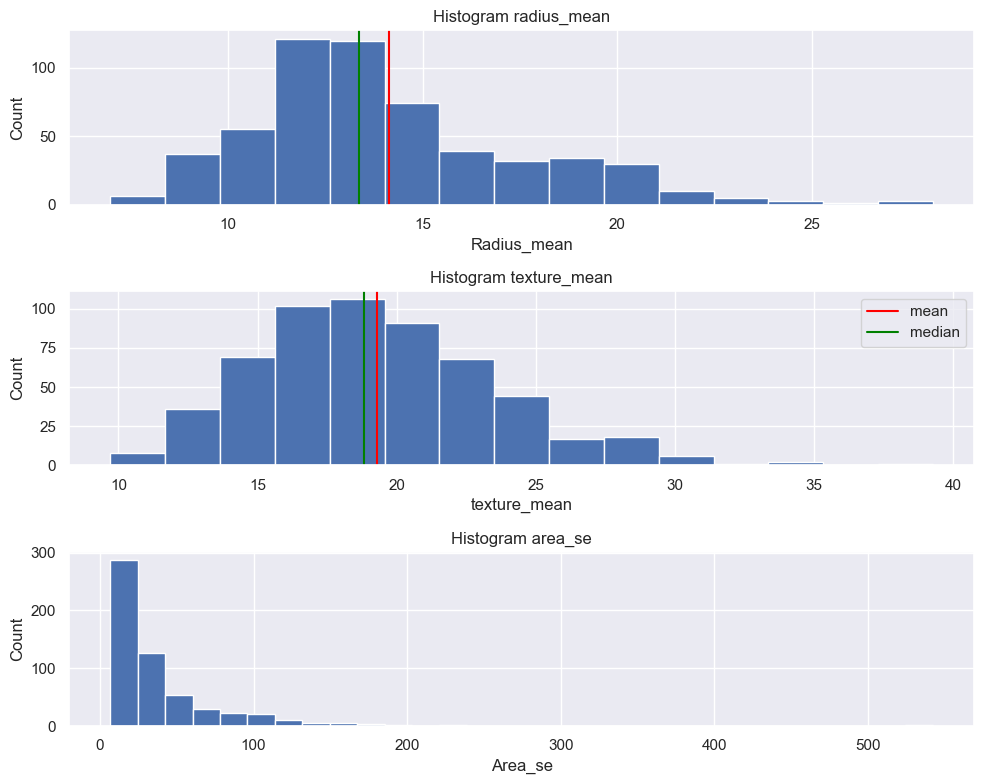

In [21]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

# bins oznacava broj jednakih dijelova na koje ce vrijednosti atributa bit podijeljenje
ax[0].hist(data.radius_mean, bins=15)
ax[0].axvline(data.radius_mean.mean(), color='red', label='mean')
ax[0].axvline(data.radius_mean.median(), color='green', label='median')
ax[0].set_xlabel('Radius_mean')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram radius_mean')

ax[1].hist(data.texture_mean, bins=15)
ax[1].axvline(data.texture_mean.mean(), color='red', label='mean')
ax[1].axvline(data.texture_mean.median(), color='green', label='median')
ax[1].set_xlabel('texture_mean')
ax[1].set_ylabel('Count')
ax[1].legend()
ax[1].set_title('Histogram texture_mean')

ax[2].hist(data.area_se, bins=30)
ax[2].set_xlabel('Area_se')
ax[2].set_ylabel('Count')
ax[2].set_title('Histogram area_se')

plt.tight_layout()
plt.show()

Prvi i drugi graf: 
    S obzirom da je linija koja predstavlja medijan lijevo od srednje vrijendosti, to ukazuje na pozitivnu zakrivljneost, rep je duži na desnoj strani, a veći dio podataka je na lijevoj strani grafa.
Treći graf:
    Zbog stršećih vrijednosti graf ima produžen desni rep .

Iz sljedeće matrice dijagrama raspršenja vidimo ovisnost izabranih atributa i dijagnoze.
Na dijagonali je raspodjela pojedinačnih varijabli. 
Ostali grafovi su dijagrami raspršenja koji prikazuju odnos parova varijabli, ako podaci prate neki uzorak to ukazuje na određenu korelaciju. 
S obzirom da smo za ovu matricu izabrali atribute koji su u velikoj korelaciji s dijagnozom, narančaste i plave točkice se preklapaju u malim količinama.


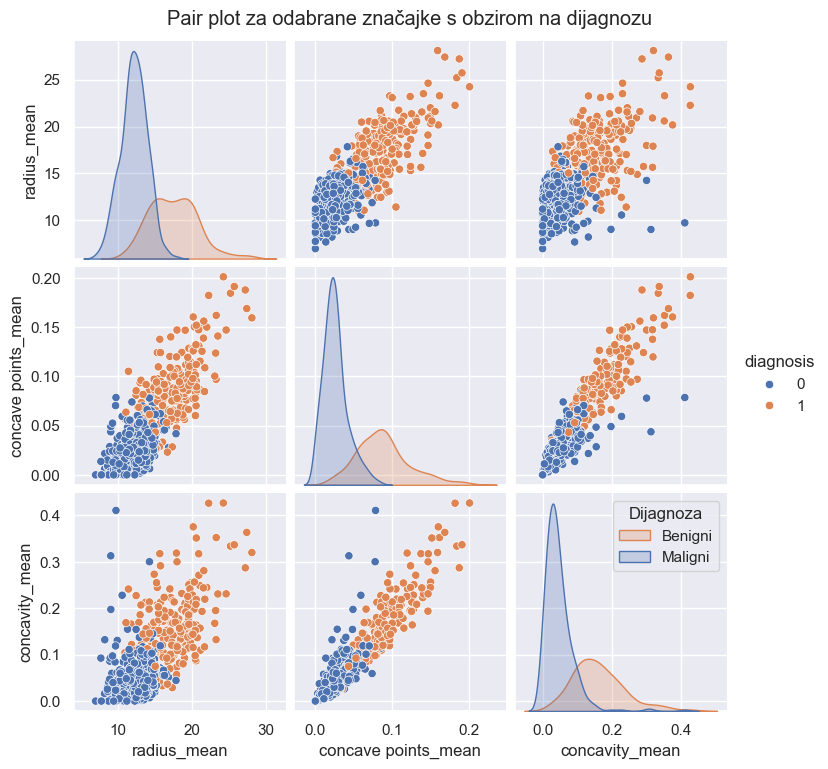

In [22]:
class_labels = {1: 'Maligni', 0: 'Benigni'}
pair_plot = sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'concave points_mean', 'concavity_mean'])
plt.suptitle('Pair plot za odabrane značajke s obzirom na dijagnozu', y=1.02)
plt.legend(title='Dijagnoza', loc='upper right', labels=['Benigni', 'Maligni'])
plt.show()

Matrica dijagrama raspršenja za atribute nekorelirane s dijagnozom. 
Točkice različitih boja preklapaju se puno više nego u prethodnoj matrici dijagrama raspršenja.
Isto tako vidimo u prošloj matrici točkice na dijagramima raspršenja pratile su određeni uzorak prema gore ili dole što se ovdje slabije vidi.

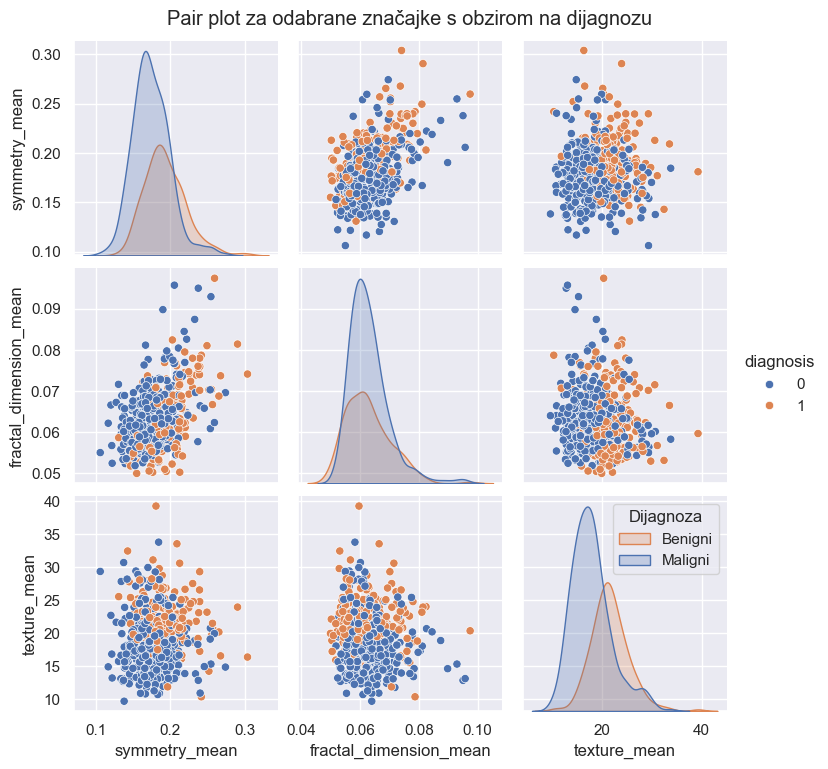

In [23]:
class_labels = {1: 'Maligni', 0: 'Benigni'}
pair_plot = sns.pairplot(data, hue='diagnosis', vars=['symmetry_mean', 'fractal_dimension_mean', 'texture_mean'])
plt.suptitle('Pair plot za odabrane značajke s obzirom na dijagnozu', y=1.02)
plt.legend(title='Dijagnoza', loc='upper right', labels=['Benigni', 'Maligni'])
plt.show()